In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
########################### OLD FUNCTION TO CREATE GRID: NEEDS CORRECTION! ###########################
def creategrid(a0, Nx, Ny):
    # set particle x- and y- coordinates
    # !!!! later move to create_top_surface.ipynb !!!


    # First basis vector V = (Vx,Vy)
    Vx = a0
    Vy = 0
    # Second basis vector W = (Wx,Wy)
    Wx = a0*np.sin(np.pi/6)
    Wy = a0*np.cos(np.pi/6)

    # create arrays that hold particle positions
    xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
    yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles

    ################# TYPE 1 OF GRID ################

    for j in range(Ny):
        for i in range(Nx):
            xPos[i,j] = i*Vx + j*Wx
            yPos[i,j] = i*Vy + j*Wy
                if xPos[i,j]>xPos[-1,1]:
                    xPos[i,j] = i-(Nx-1)*Vx + j*Wx

    for j in range(1,Ny):
        for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape
            if xPos[i,j]>xPos[-1,1]:
                xPos[i,j] = xPos[i-(Nx-1),j-2]

    return xPos, yPos

In [27]:
########################### CORRECTED FUNCTION TO CREATE GRID ###########################
def creategrid(a0, Nx, Ny):

    # First basis vector V = (Vx,Vy)
    Vx = a0
    Vy = 0
    # Second basis vector W = (Wx,Wy)
    Wx = a0*np.sin(np.pi/6)
    Wy = a0*np.cos(np.pi/6)

    # Create arrays that hold particle positions
    xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
    yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles

    # Move last particles of (almost) each line to get rectangular grid shape
    for j in range(Ny):
        for i in range(Nx):
            xPos[i,j] = i*Vx + j*Wx
            yPos[i,j] = i*Vy + j*Wy
            if xPos[i,j]>((Nx-1)*Vx + Wx):
                print "i=", i, "j=", j, "x=", xPos[i,j], "Xlim =", ((Nx-1)*Vx + Wx)
                xPos[i,j] = xPos[i,j] - (Nx*Vx)

    return xPos, yPos

In [28]:
Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)
a0 = 5.0 # set lattice vector length

xPos, yPos = creategrid(a0, Nx, Ny)

i= 9 j= 2 x= 50.0 Xlim = 47.5
i= 9 j= 3 x= 52.5 Xlim = 47.5
i= 8 j= 4 x= 50.0 Xlim = 47.5
i= 9 j= 4 x= 55.0 Xlim = 47.5
i= 8 j= 5 x= 52.5 Xlim = 47.5
i= 9 j= 5 x= 57.5 Xlim = 47.5
i= 7 j= 6 x= 50.0 Xlim = 47.5
i= 8 j= 6 x= 55.0 Xlim = 47.5
i= 9 j= 6 x= 60.0 Xlim = 47.5
i= 7 j= 7 x= 52.5 Xlim = 47.5
i= 8 j= 7 x= 57.5 Xlim = 47.5
i= 9 j= 7 x= 62.5 Xlim = 47.5
i= 6 j= 8 x= 50.0 Xlim = 47.5
i= 7 j= 8 x= 55.0 Xlim = 47.5
i= 8 j= 8 x= 60.0 Xlim = 47.5
i= 9 j= 8 x= 65.0 Xlim = 47.5
i= 6 j= 9 x= 52.5 Xlim = 47.5
i= 7 j= 9 x= 57.5 Xlim = 47.5
i= 8 j= 9 x= 62.5 Xlim = 47.5
i= 9 j= 9 x= 67.5 Xlim = 47.5


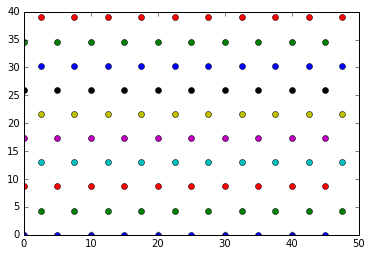

In [29]:
plt.plot(xPos, yPos, 'o')
plt.show()

In [ ]:
############ COPY OF FUNCTION TO PLOT GRID FOR TESTING creategrid()############
def plotgrid(pType, a0, pc, Nx, Ny, text, loop):
    
    xPos, yPos = creategrid(a0, Nx, Ny)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='yellow')
                
    plt.title("Pc = " + str(int(pc*100)) + text, fontsize= 14)
    plt.grid()
    plt.show()
    myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    #fig.savefig(myfile ,format='pdf')

In [ ]:
############ COPY OF FUNCTION JUST FOR TESTING creategrid()############
def C_restart(Nx,Ny):
    pType = np.zeros([Nx,Ny],dtype=str) # particle type

    # set standard particle type as Carbon
    for i in range(Nx):
        for j in range(Ny):
            pType[i,j] = 'C'
    return pType

In [ ]:
############ COPY OF FUNCTION JUST FOR TESTING creategrid()############
def loop1(xinterval,yinterval, Nx, Ny):
    pType = C_restart(Nx,Ny)
    n_oxys = 0
    for k in range(0,Nx,yinterval*2):
        for l in range(0,Ny,xinterval*2):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    for k in range(yinterval,Nx,xinterval*2):
        for l in range(xinterval,Ny,xinterval*2):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc

In [ ]:
xinterval = 2
yinterval = 2
loop = 'test'
pType, pc = loop1(xinterval,yinterval, Nx, Ny)
mytext = ', Loop1, Xint='+ str(xinterval)+', Yint='+str(yinterval)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)

In [ ]:
print xPos